<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 0. 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings ignore
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기

In [12]:
taxi_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/trip.csv')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


# 2. 데이터 정보 확인하기

In [13]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


# 3. 결측치 확인 및 제거하기

In [10]:
md = taxi_data.isna().sum()
md

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [11]:
md = taxi_data.isna().mean()
md

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


## 3-1. 결측치 유무 및 비율 살펴보기
- 결측치 유무 : fare_amount에 결측값 존재
- 결측치 개수 : 3
- 결측치 비율 : 0.000132

In [18]:
# 실제로 결측치 비율을 계산하는 방법 사용해보기
md_percentage = (md / len(taxi_data)) * 100
md_percentage

,0
passenger_name,0.000000e+00
tpep_pickup_datetime,0.000000e+00
tpep_dropoff_datetime,0.000000e+00
payment_method,0.000000e+00
passenger_count,0.000000e+00
trip_distance,0.000000e+00
fare_amount,5.821451e-07
tip_amount,0.000000e+00
tolls_amount,0.000000e+00


In [21]:
# 결측치가 있는 컬럼만 뽑아보기
print(md_percentage[md_percentage > 0])

fare_amount    5.821451e-07
dtype: float64


## 3-2. 결측치 제거하기

In [22]:
# 결측치 제거
taxi_data = taxi_data.dropna(subset=['fare_amount'])

# 잘 제거되었는지 간단히 확인
taxi_data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,0
tip_amount,0
tolls_amount,0


## 3-3. Step2의 택시 주행 시간, 주행 거리, 요금 상관관계 파악

### 주행 시간 계산하기

In [28]:
# 택시 주행 시간 계산을 위한 탑승 시간, 하차 시간 데이터 타입 파악
print(taxi_data['tpep_pickup_datetime'].dtype)
print(taxi_data['tpep_dropoff_datetime'].dtype)

object
object


In [30]:
# object로 저장되어 있기 때문에, 연산을 위해 datetime으로 형변환
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22698 non-null  object        
 1   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 3   payment_method         22698 non-null  object        
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   fare_amount            22698 non-null  float64       
 7   tip_amount             22698 non-null  float64       
 8   tolls_amount           22698 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [33]:
# 주행 시간 계산하기(분 단위로!)
taxi_data['trep_driving_time'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,16.716667


### 주행 시간 - 주행 거리 사이의 상관관계 분석하기
- 주행 시간이 길수록 -> 요금이 비싸지는 것
  - 0-200 사이의 driving_time의 데이터가 -> 주로 trip_distance가 작을수록 몰려 있는 경향이 있음.

- 즉, 높은 확률로 양의 상관관계라고 볼 수 있음.

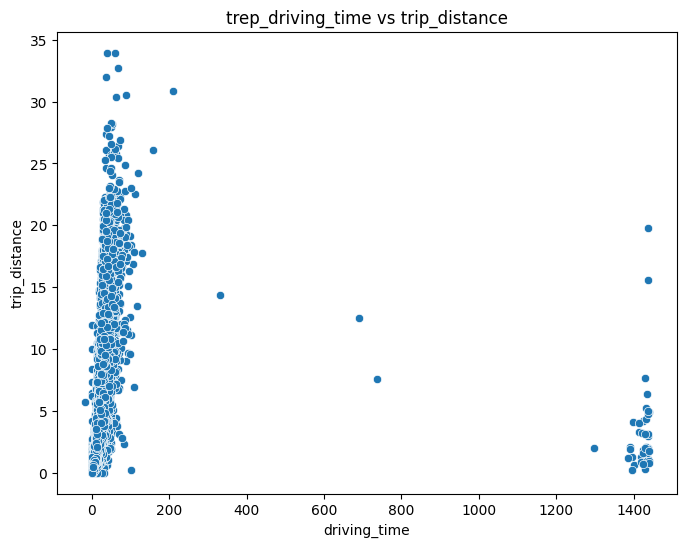

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='trep_driving_time', y='trip_distance')
plt.title('trep_driving_time vs trip_distance')
plt.xlabel('driving_time')
plt.ylabel('trip_distance')
plt.show()

### 주행 거리 - 주행 요금 사이의 상관관계 분석하기
- 주행 거리가 짧을 수록 주행 요금이 작게 측정
  - 택시에는 기본 요금이 있어 거리가 0부터 30에 근접한 거리까지는 요금이 비슷하게 책정되는 것으로 추정됨.
  - 그 외의 주행 거리가 짧은 부분에 올라가 있는 이상치 데이터는 "오류"일 가능성이 높아보임.
  - 거리가 30 이상인 데이터는 소량의 데이터이자 이상치까지는 아닌 것으로 판단.

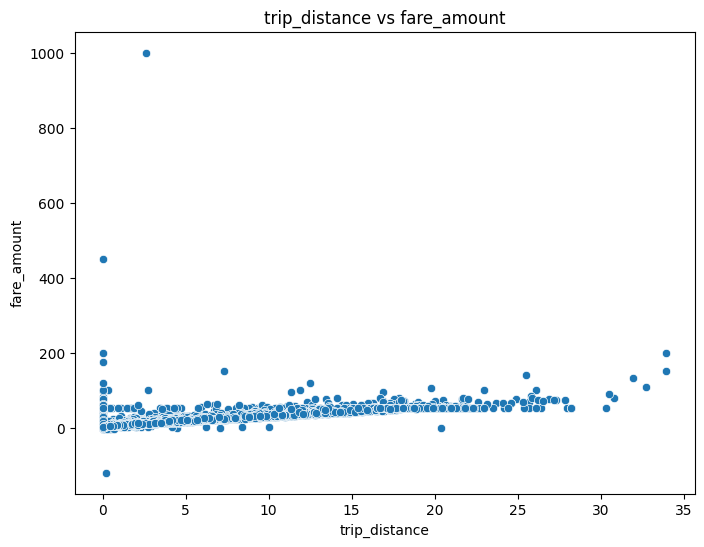

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='trip_distance', y='fare_amount')
plt.title('trip_distance vs fare_amount')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.show()

### 주행 시간 - 요금 사이의 상관관계 분석하기
- 주행 시간이 짧은 경우에 적은 요금으로 책정
  - 가장 데이터가 쏠려있음을 확인 가능

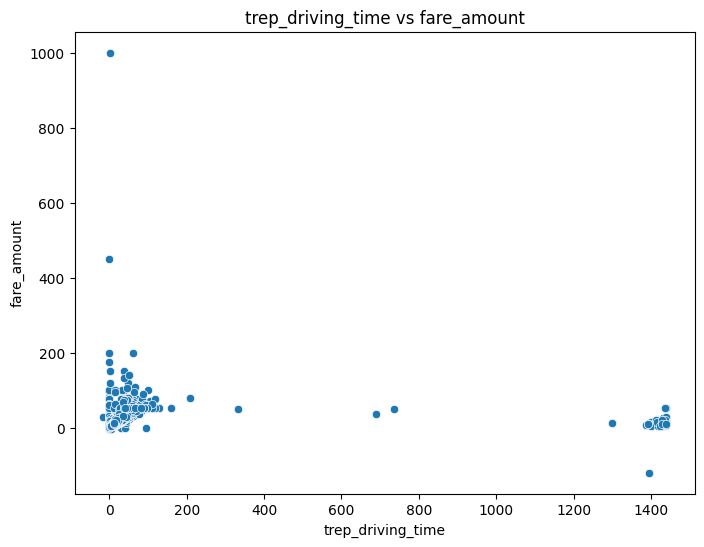

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='trep_driving_time', y='fare_amount')
plt.title('trep_driving_time vs fare_amount')
plt.xlabel('trep_driving_time')
plt.ylabel('fare_amount')
plt.show()

### (참고) 상관 행렬을 사용해 모든 상관관계 분석하기(ChatGPT 활용)
- 양의 상관관계
  - +1에 가까울수록 두 변수가 강한 양의 상관관계를 가짐.
  - 하나의 값 ⬆️ -> 다른 값 ⬆️

- 음의 상관관계
  - -1에 가까울수록 두 변수가 강한 음의 상관관계를 가짐.
  - 하나의 값 ⬆️ -> 다른 값 ⬇️


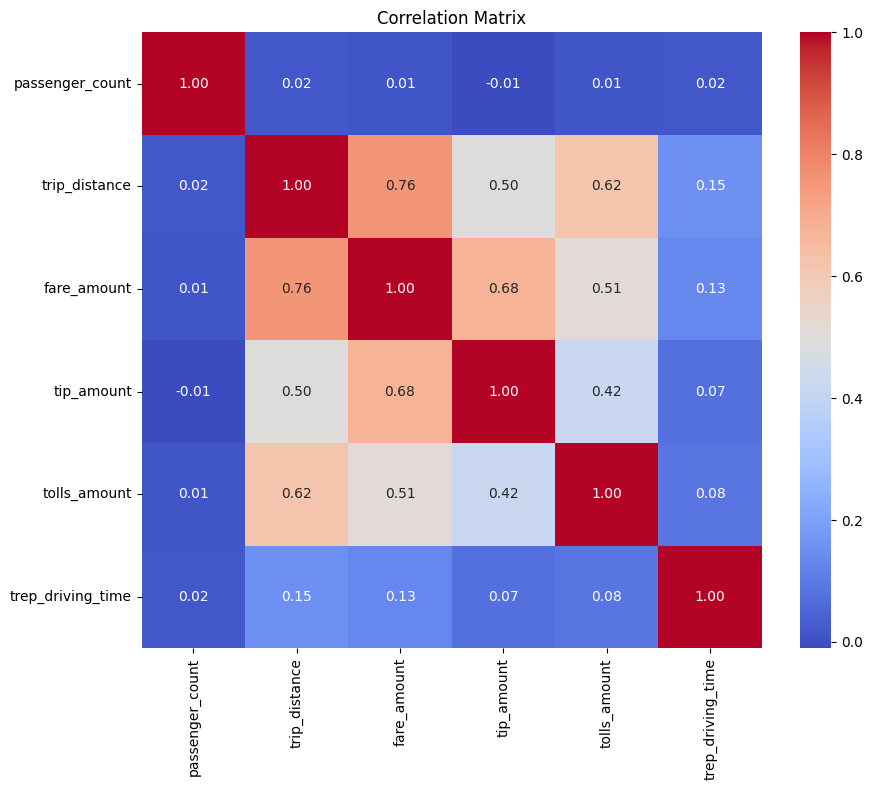

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들만 선택
numeric_taxi_data = taxi_data.select_dtypes(include='number')

# 수치형 변수들 간의 상관 행렬 계산
correlation_matrix = numeric_taxi_data.corr()

# 상관 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. payment_method 형태 통일하기
- "Card"로 통합!

In [45]:
taxi_data['payment_method'] = taxi_data['payment_method'].replace(['Credit Card', 'Debit Card'], 'Card')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,16.716667


In [46]:
taxi_data.payment_method.unique()

array(['Card', 'Cash'], dtype=object)

# 5. 이상치 탐지 & 처리하기

### 5-1. 이상치 탐지

In [50]:
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
count,22698,22698,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,2017-06-29 07:26:40.725746688,2017-06-29 07:43:41.432901632,1.643581,2.912318,13.024009,1.835327,0.312302,17.011786
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,-120.000000,0.000000,0.000000,-16.983333
25%,2017-03-30 02:35:36.750000128,2017-03-30 02:45:08.500000,1.000000,0.990000,6.500000,0.000000,0.000000,6.650000
50%,2017-06-23 12:31:13.500000,2017-06-23 12:53:38,1.000000,1.610000,9.500000,1.350000,0.000000,11.175000
75%,2017-10-02 10:43:06,2017-10-02 11:07:42.500000,2.000000,3.060000,14.500000,2.450000,0.000000,18.383333
max,2017-12-31 23:45:30,2017-12-31 23:49:24,36.000000,33.960000,999.990000,200.000000,19.100000,1439.550000
std,NaN,NaN,1.304983,3.651335,13.240074,2.800093,1.398775,61.997201


- 현재, 4가지 컬럼에서 이상치가 의심되는 상황
  - passenger_count
  - trip_distance
  - fare_amount
  - trep_driving_time

<Axes: xlabel='None', ylabel='passenger_count'>

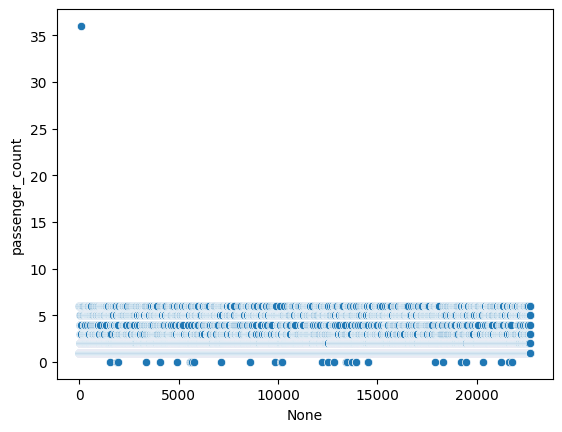

In [53]:
# passenger_count
sns.scatterplot(x=taxi_data.index, y=taxi_data['passenger_count'])

- 즉, 승객의 숫자가 0 이하일 경우와 35를 넘어선 데이터를 제거!

<Axes: xlabel='None', ylabel='trip_distance'>

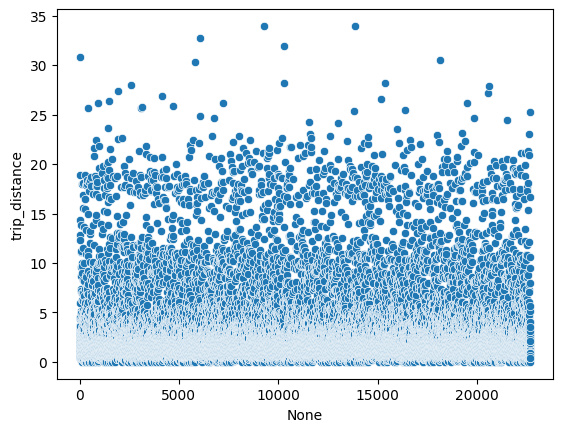

In [55]:
# trip_distance
sns.scatterplot(x=taxi_data.index, y=taxi_data['trip_distance'])

- 주행 거리가 0 이하일 경우와 30 라인을 넘어선 데이터를 제거!

<Axes: xlabel='None', ylabel='fare_amount'>

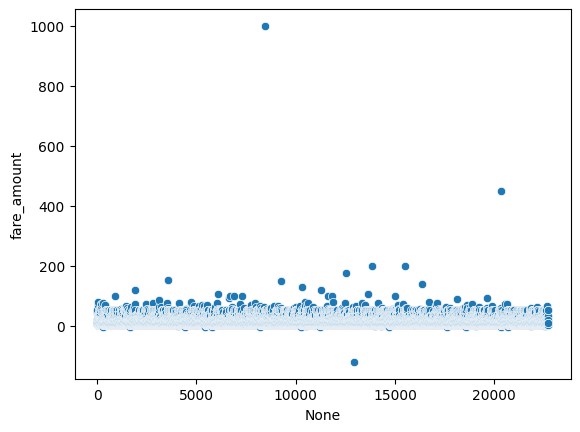

In [56]:
# fare_amount
sns.scatterplot(x=taxi_data.index, y=taxi_data['fare_amount'])

- 요금이 0 이하일 경우와 500 이상인 값을 제거!

<Axes: xlabel='None', ylabel='trep_driving_time'>

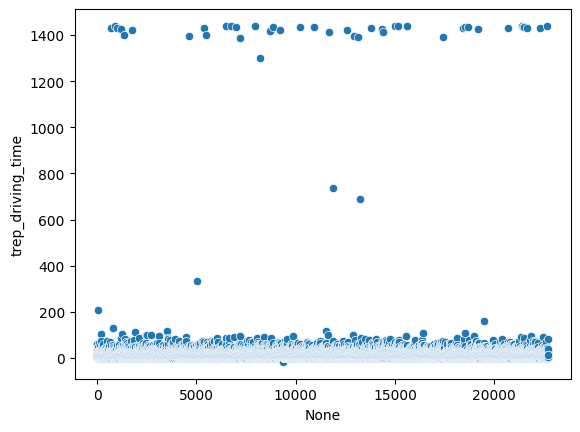

In [57]:
# trep_driving_time
sns.scatterplot(x=taxi_data.index, y=taxi_data['trep_driving_time'])

- 주행 시간의 경우 음수가 있음. -> 음수 제거!

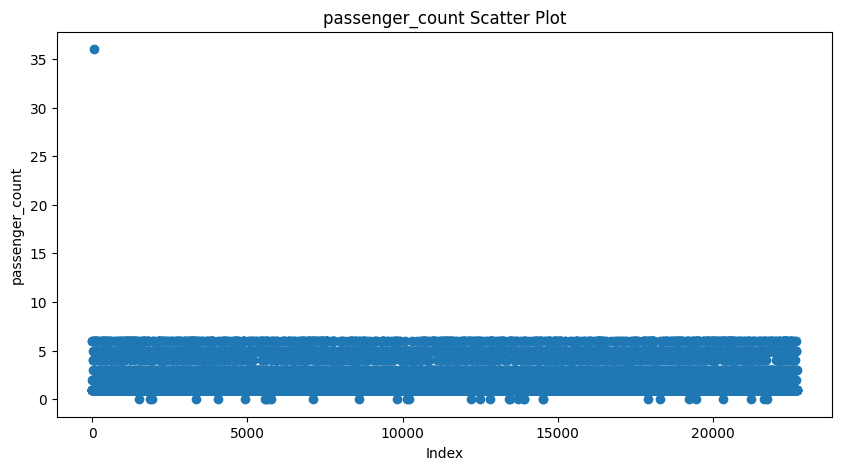

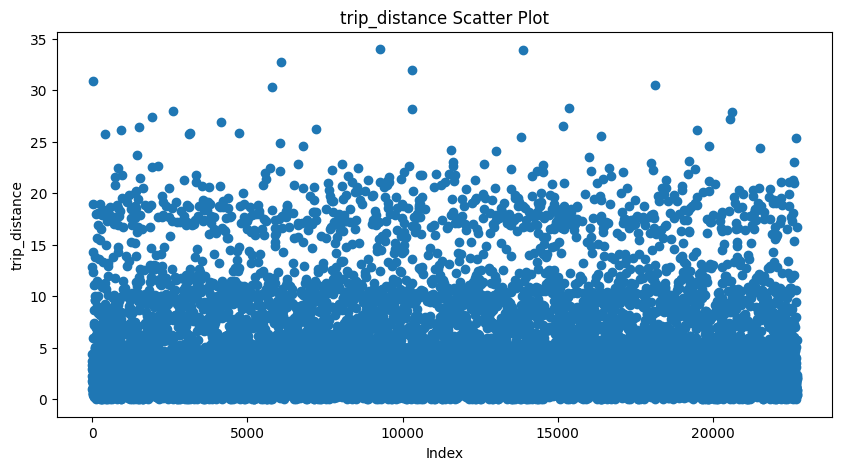

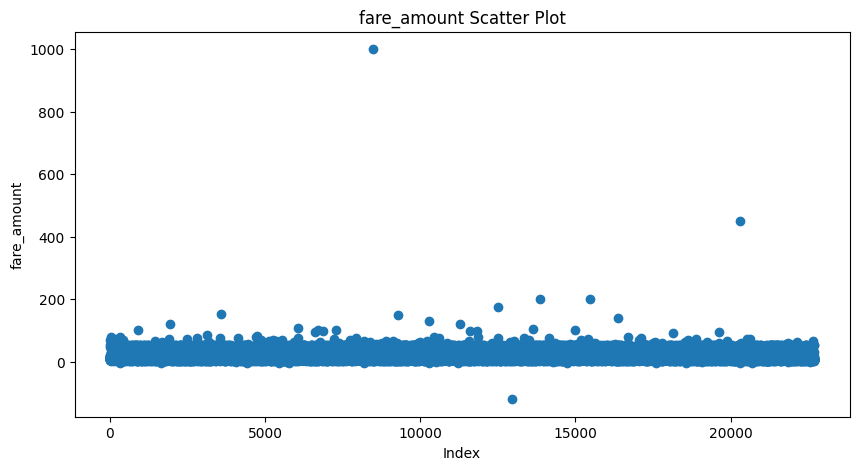

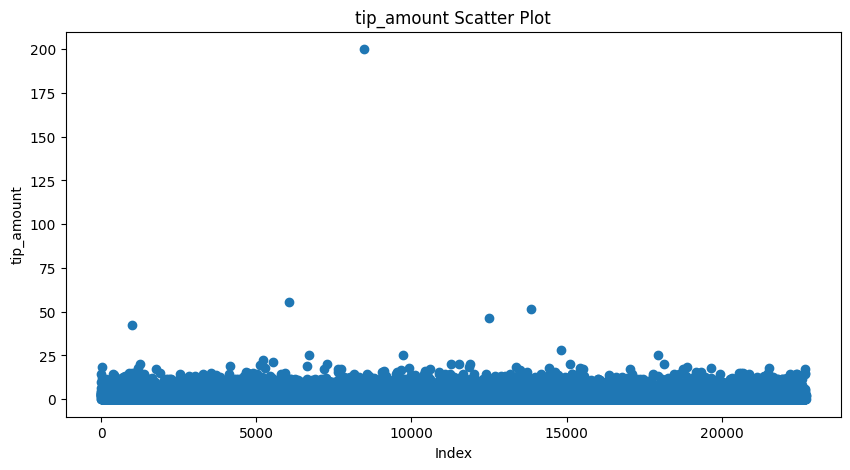

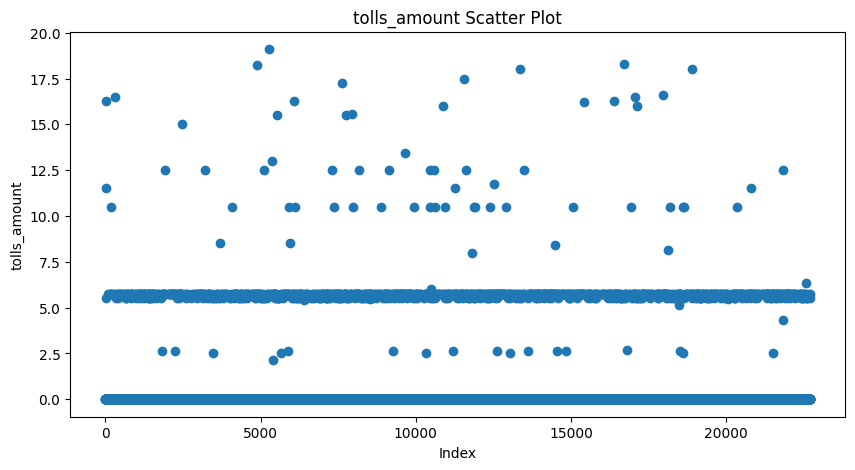

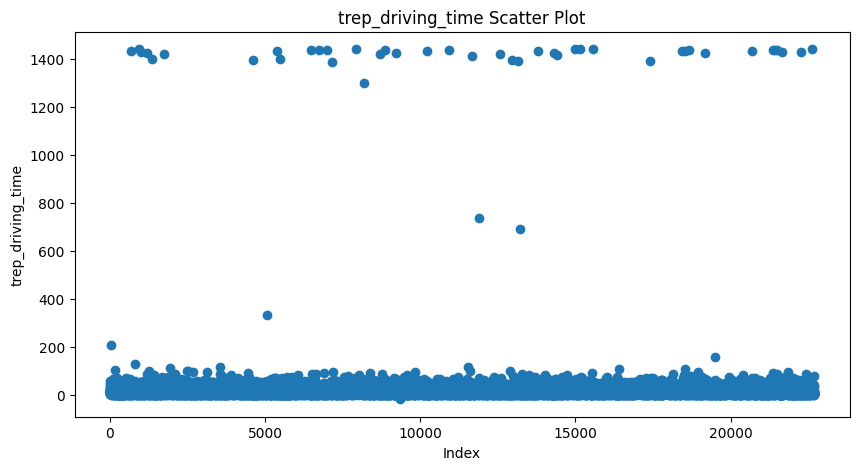

In [48]:
# 참고: 한번에 뽑아서 보는 방법!
numeric_cols = taxi_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    plt.scatter(taxi_data.index, taxi_data[col])
    plt.title(f'{col} Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

### 5-2. 이상치 제거하기

In [58]:
# 이상치 조건
def is_outlier(row):
    return (
        row['trip_distance'] > 0 and
        row['fare_amount'] > 0 and
        row['passenger_count'] > 0 and
        row['trep_driving_time'] >= 0 and
        row['trip_distance'] < 30 and  # 30 미만으로 설정
        row['fare_amount'] <= 500 and  # 500 이하로 설정
        row['passenger_count'] < 35     # 35 미만으로 설정
    )

taxi_data = taxi_data[taxi_data.apply(lambda row: is_outlier(row), axis=1)]

In [59]:
taxi_data['trip_distance'].sort_values()

,trip_distance
19646,0.01
2987,0.01
9190,0.01
8199,0.01
5503,0.01
...,...
1910,27.34
20614,27.88
2594,27.97
10304,28.20


In [60]:
taxi_data['fare_amount'].sort_values()

,fare_amount
4063,0.01
11359,2.50
3084,2.50
20135,2.50
6702,2.50
...,...
14997,100.00
13623,105.00
1930,120.00
16381,140.00


In [61]:
taxi_data['passenger_count'].sort_values()

,passenger_count
22700,1
12444,1
12445,1
12446,1
12447,1
...,...
17995,6
3245,6
17990,6
3298,6


In [63]:
taxi_data['trep_driving_time'].sort_values()

,trep_driving_time
20182,0.016667
7169,0.033333
13308,0.033333
21595,0.033333
22104,0.033333
...,...
15165,1438.550000
22640,1438.650000
15000,1438.850000
15581,1439.150000


In [64]:
taxi_data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,11.933333


In [65]:
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
count,22492,22492,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000
mean,2017-06-29 02:39:54.967944448,2017-06-29 02:56:57.736039680,1.646096,2.923546,12.898213,1.815496,0.307275,17.046135
min,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,0.010000,0.000000,0.000000,0.016667
25%,2017-03-29 23:15:04,2017-03-29 23:25:16.249999872,1.000000,1.000000,6.500000,0.000000,0.000000,6.733333
50%,2017-06-23 08:38:32.500000,2017-06-23 08:56:09,1.000000,1.630000,9.500000,1.360000,0.000000,11.233333
75%,2017-10-01 16:30:10.750000128,2017-10-01 16:42:02.249999872,2.000000,3.090000,14.500000,2.450000,0.000000,18.450000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,28.230000,152.000000,42.290000,19.100000,1439.550000
std,NaN,NaN,1.285782,3.620245,10.643462,2.375483,1.377535,61.561092


In [66]:
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,16.716667


## 6. 클리닝한 데이터 CSV로 저장하기

In [69]:
taxi_data.to_csv('/content/drive/MyDrive/Colab Notebooks/data/cleaned_trip.csv', index=False)

## 7. trip.csv vs cleaned_trip csv
- 두 데이터 파일을 describe()로 비교하기

In [73]:
print("\n원본 데이터 통계:")
original_data.describe()


원본 데이터 통계:


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [74]:
print("\n클리닝된 데이터 통계:")
cleaned_data.describe()


클리닝된 데이터 통계:


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
count,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000
mean,1.646096,2.923546,12.898213,1.815496,0.307275,17.046135
std,1.285782,3.620245,10.643462,2.375483,1.377535,61.561092
min,1.000000,0.010000,0.010000,0.000000,0.000000,0.016667
25%,1.000000,1.000000,6.500000,0.000000,0.000000,6.733333
50%,1.000000,1.630000,9.500000,1.360000,0.000000,11.233333
75%,2.000000,3.090000,14.500000,2.450000,0.000000,18.450000
max,6.000000,28.230000,152.000000,42.290000,19.100000,1439.550000


- 이상치 제거 비율을 계산해 실제 데이터가 얼마나 클리닝되었는지 최종 파악하기

In [75]:
# 이상치 비율 계산
original_outlier_ratio = (len(original_data) - len(cleaned_data)) / len(original_data) * 100
print(f"이상치 제거 비율: {original_outlier_ratio:.2f}%")

이상치 제거 비율: 0.92%
